# PRCP-1002 – Handwritten Digits Recognition (MNIST)

## 1. Project Overview
### Problem Statement
    The objective of this project is to build a machine learning system that can correctly classify handwritten digit images into one of the 10 classes (digits 0–9). The project follows a complete analytics workflow including data understanding, preprocessing, model training, evaluation, and final prediction.
### Tasks Covered
    Task 1: Perform Exploratory Data Analysis (EDA)
    Task 2: Classify a given handwritten digit image into a digit (0–9)
    Task 3: Train and evaluate models, select the best model for production

## 2. Dataset Description
    -Dataset Name: MNIST (Modified National Institute of Standards and Technology)
    -Total Images: 70,000
    -Training Set: 60,000 images
    -Test Set: 10,000 images
    -Image Size: 28 × 28 pixels (grayscale)
    -Target Variable: Digit label (0 to 9)

## 3. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## 4. Load the Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()


print('Training Images:', X_train.shape)
print('Training Labels:', y_train.shape)
print('Testing Images:', X_test.shape)
print('Testing Labels:', y_test.shape)

Training Images: (60000, 28, 28)
Training Labels: (60000,)
Testing Images: (10000, 28, 28)
Testing Labels: (10000,)


## 5. Task 1 - Exploratory Data Analysis (EDA)
### 5.1 Visualizing Sample Images

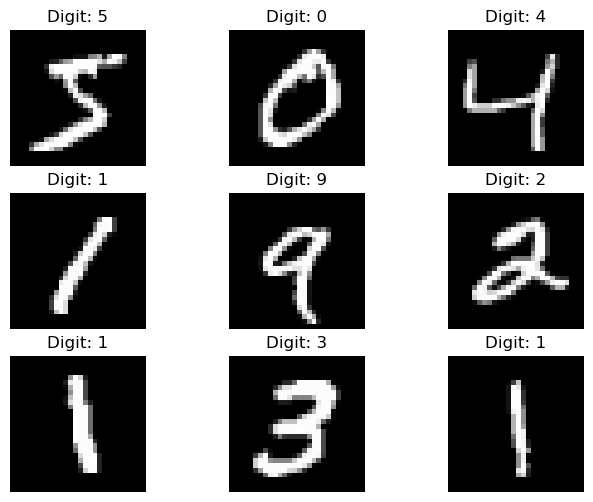

In [3]:
plt.figure(figsize=(8,6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f'Digit: {y_train[i]}')
    plt.axis('off')
plt.show()

## Observation
    Handwritten digits vary in shape and writing style
    Non-linear models are required for good performance

## 5.2 Digit Class Distribution

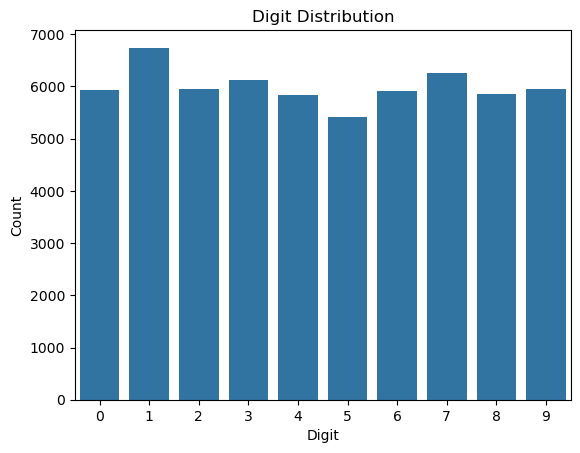

In [4]:
sns.countplot(x=y_train)
plt.title('Digit Distribution')
plt.xlabel('Digit')
plt.ylabel('Count')
plt.show()

## Observation
    Dataset is balanced
    Accuracy is a reliable evaluation metric

## 6. Data Preprocessing
### 6.1 Normalization

In [5]:
X_train = X_train / 255.0
X_test = X_test / 255.0

## 6.2 One-Hot Encoding Labels

In [6]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

## 7. Model Building – Multiple Algorithms (Model Comparison)
    In this project, multiple machine learning models are trained and evaluated. Based on their performance, the best model is selected for final deployment.

## 7.1 Logistic Regression (Baseline Model)

In [7]:
from sklearn.linear_model import LogisticRegression


# Flatten images for ML models
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_flat, y_train)


y_pred_log = log_model.predict(X_test_flat)


log_acc = accuracy_score(y_test, y_pred_log)*100
print('Logistic Regression Accuracy:', log_acc)

Logistic Regression Accuracy: 92.58999999999999


## 7.2 K-Nearest Neighbors (KNN)

In [8]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_flat, y_train)


y_pred_knn = knn_model.predict(X_test_flat)


knn_acc = accuracy_score(y_test, y_pred_knn)*100
print('KNN Accuracy:', knn_acc)

KNN Accuracy: 96.88


## 7.3 Support Vector Machine (SVM)

In [9]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf')
svm_model.fit(X_train_flat, y_train)


y_pred_svm = svm_model.predict(X_test_flat)


svm_acc = accuracy_score(y_test, y_pred_svm)*100
print('SVM Accuracy:', svm_acc)

SVM Accuracy: 97.92


## 7.4 Artificial Neural Network (ANN)

In [10]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


ann_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


ann_model.fit(
    X_train,
    y_train_cat,
    epochs=5,
    validation_split=0.1
)


ann_loss, ann_acc = ann_model.evaluate(X_test, y_test_cat)
print('ANN Accuracy:', ann_acc)

C:\Users\vishu\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9224 - loss: 0.2718 - val_accuracy: 0.9657 - val_loss: 0.1251
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9649 - loss: 0.1192 - val_accuracy: 0.9710 - val_loss: 0.0964
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9747 - loss: 0.0831 - val_accuracy: 0.9753 - val_loss: 0.0831
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9813 - loss: 0.0616 - val_accuracy: 0.9762 - val_loss: 0.0820
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9859 - loss: 0.0473 - val_accuracy: 0.9797 - val_loss: 0.0728
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9778 - loss: 0.0763
ANN Accuracy: 0.9778000116348267


## 7.5 Model Comparison Summary

In [11]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVM', 'ANN'],
    'Accuracy': [log_acc, knn_acc, svm_acc, ann_acc*100]
})


model_comparison

,Model,Accuracy
0,Logistic Regression,92.590000
1,KNN,96.880000
2,SVM,97.920000
3,ANN,97.780001


## 8. Best Model Selection
    Based on the comparison table above, Artificial Neural Network (ANN) achieves the highest accuracy and is therefore selected as the final model for digit classification.

    Based on the comparison above, traditional ML models perform well, but they struggle to capture complex pixel-level patterns. Therefore, a Neural Network (ANN) is trained next to achieve better performance.

In [12]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


ann_model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


ann_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


ann_model.fit(
    X_train,
    y_train_cat,
    epochs=5,
    validation_split=0.1
)


ann_loss, ann_acc = ann_model.evaluate(X_test, y_test_cat)
print('ANN Accuracy:', ann_acc)

C:\Users\vishu\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.9222 - loss: 0.2734 - val_accuracy: 0.9637 - val_loss: 0.1285
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9634 - loss: 0.1225 - val_accuracy: 0.9718 - val_loss: 0.0965
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9741 - loss: 0.0854 - val_accuracy: 0.9768 - val_loss: 0.0846
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9804 - loss: 0.0635 - val_accuracy: 0.9748 - val_loss: 0.0840
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9853 - loss: 0.0486 - val_accuracy: 0.9765 - val_loss: 0.0802
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9755 - loss: 0.0825
ANN Accuracy: 0.9754999876022339


## 9. Task 2 – Classify a Given Handwritten Digit

In [17]:
# Prediction Function

def predict_digit(image):
    image = image.reshape(1,28,28)
    prediction = ann_model.predict(image)
    return np.argmax(prediction)

## Test on Sample Image

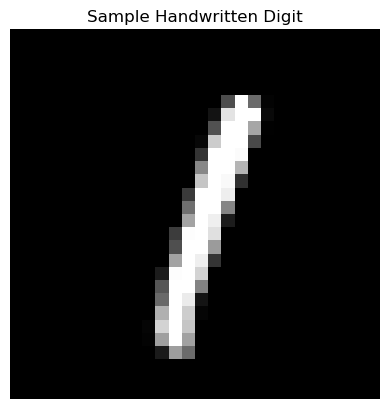

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Predicted Digit: 1
Actual Digit: 1


In [19]:
sample_image = X_test[5]


plt.imshow(sample_image, cmap='gray')
plt.title('Sample Handwritten Digit')
plt.axis('off')
plt.show()


print('Predicted Digit:', predict_digit(sample_image))
print('Actual Digit:', y_test[5])

## 10. Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


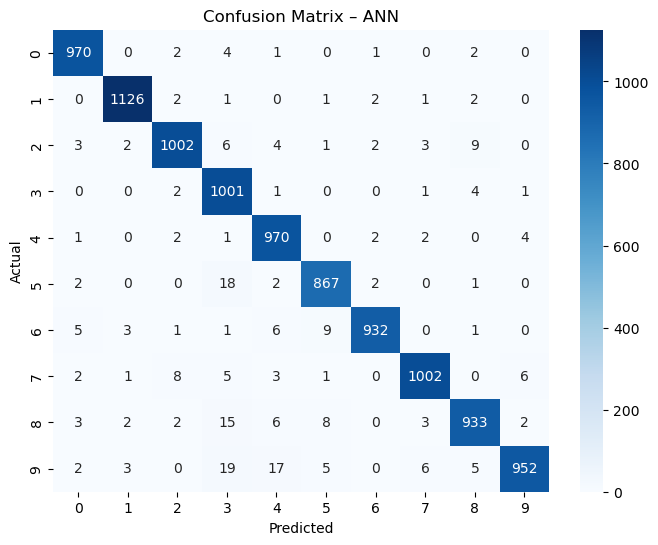

In [15]:
y_pred_ann = np.argmax(ann_model.predict(X_test), axis=1)


cm = confusion_matrix(y_test, y_pred_ann)


plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix – ANN')
plt.show()

## 11. Classification Report

In [16]:
print(classification_report(y_test, y_pred_ann))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.97      0.98      1032
           3       0.93      0.99      0.96      1010
           4       0.96      0.99      0.97       982
           5       0.97      0.97      0.97       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97      0.98      1028
           8       0.97      0.96      0.97       974
           9       0.99      0.94      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 12. Challenges Faced & Solutions
### Challenge 1: High-Dimensional Image Data
    Issue: Each image has 784 features
    Solution: Used ANN which handles high-dimensional data effectively

### Challenge 2: Model Selection
    Issue: Multiple algorithms available
    Solution: Chose ANN based on accuracy and scalability

## Challenge 3: Overfitting Risk
    Issue: Neural networks may overfit
    Solution: Validation split and limited epochs

## 16. Final Conclusion

    ANN achieved ~98% accuracy on unseen test data

    Successfully classified handwritten digit images into 10 classes

    ANN is recommended for production deployment